In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/tma4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

In [1]:
import numpy as np
import scipy.interpolate as ip
import matplotlib.pyplot as plt

## Problem 2

In this problem, you are asked to estimate the Lebesgue constant for function interpolation. Given a set of nodes $x_0,\ldots x_n\in[a,b]$, the Lebesgue constant $\Lambda_n$ is defined as 

$$ \Lambda_n := \max_{x\in[a,b]} L(x) $$

where

$$ L(x) = \sum_{i=1}^n |L_{i,n}(x)|. $$

Here, $L_{i,n}(x)$ is the Lagrange polynomial number $i$, given by

$$ L_{i,n}(x) = \prod_{j\neq i} \frac{x-x_j}{x_i-x_j}. $$

Using the Lebesgue constant, we can obtain an upper bound for the interpolation error relative to the best interpolation error. Assume that $p$ is some interpolating polynomial and $p^\ast$ is the best interpolating polynomial. Then we have that

$$ \|p-f\| \leq (\Lambda_n+1) \|p^\ast-f\|. $$

Note that this holds for every norm $\|\cdot\|$.

**a)**

Write a function which computes $L(x)$, given a set of nodes $x_0,\ldots x_n$.

In [52]:
def L(x, x_nodes):
    # Computes L(x) given nodes x_nodes
    N = len(x_nodes)
    
    l = np.ones(N)
    
    for i in range(N):
        for j in (k for k in range(N) if k != i):
            l[i] *= (x - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
            
    return np.sum(np.abs(l))

We want to estimate $\Lambda_n$ for nodes on the interval $[-1,1]$. Spesifically we want to consider

- Uniformly distributed nodes:  $x_i = -1+2i/n, \ i=0,\ldots n$
- Chebyshev nodes: $x_i = \cos\left(\pi\frac{2i+1}{2n+2}\right), \ i=0,\ldots n$


**b)**

Plot $L(x)$ for $x\in[-1,1]$ and give an estimate for $\Lambda_n$ for $n=5,10,15,20$ for using 

- Uniformly distributed nodes.
- Chebyshev nodes.

What do you observe? Do you expect uniformly distributed nodes or Chebyshev nodes to give a better interpolating polynomial?

*Hint: When estimating $\Lambda_n$, you can construct a very fine grid of values of $x$'s, compute $L(x)$ for each $x$ and find the maximum of all values of $L(x)$.* 

*If you prefer, you may use the following template:*

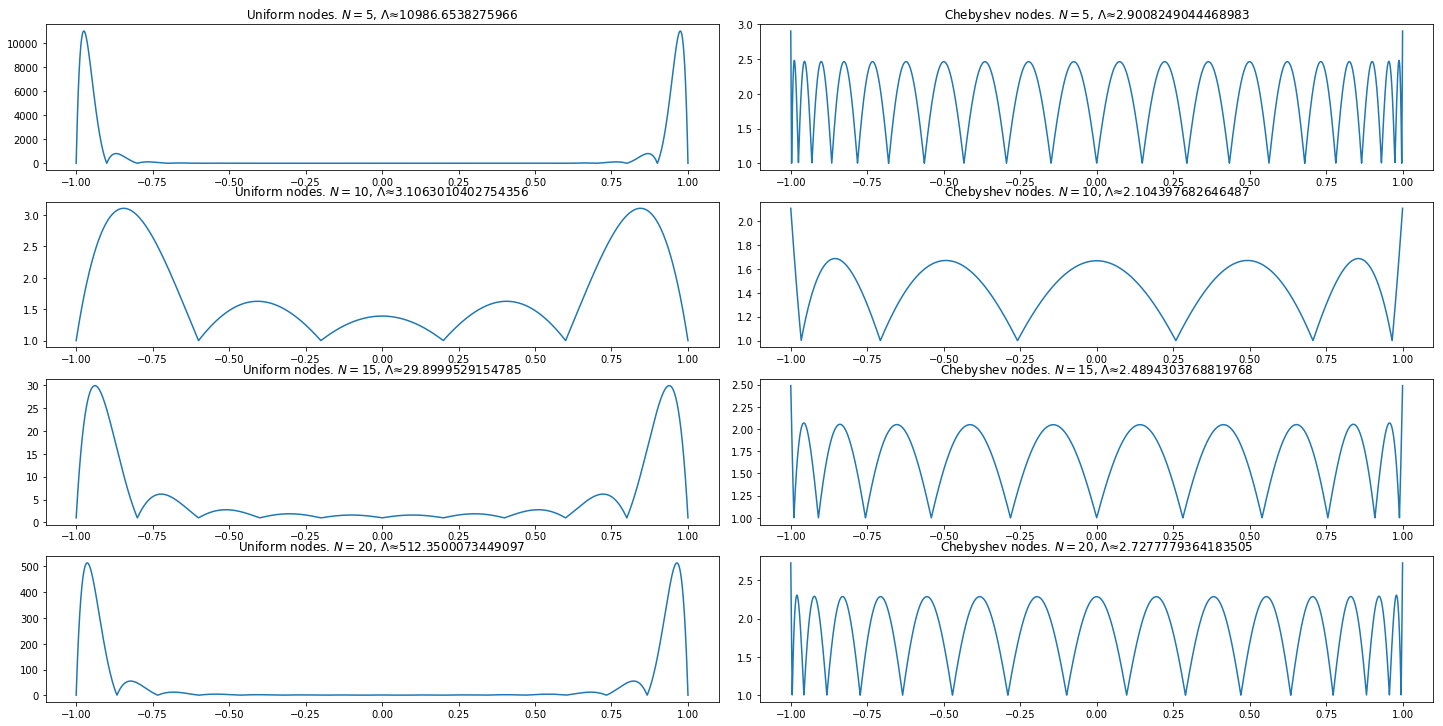

In [54]:
import matplotlib.pyplot as plt

# Compute a fine grid of x's:
x_vec = np.linspace(-1,1,10000)

def unif(n): return np.array([-1 + 2*k/n for k in range(n+1)])
def cheb(n): return np.array([np.cos(np.pi * (2*k + 1)/(2*n+2)) for k in range(n+1)])

# Compute L(x) for all x in x_vec and store the values of L in L_vec.
# For example: L_vec[i] = L(x_vec[i], x_nodes)
# ...

plt.rcParams["figure.figsize"] = (20,10)

fig, axs = plt.subplots(4, 2)
plt.tight_layout()

for i, N in enumerate([5, 10, 15, 20]):
    # Construct a placeholder for the values of L(x)
    L_vec = np.zeros(x_vec.shape)
    
    un_ax = axs[i,0]
    ch_ax = axs[i,1]
    
    for i in range(len(L_vec)):
        L_vec[i] = L(x_vec[i], un_nodes)

    # Lambda_n_estimate will now approximate the true value of Chebyshev's constant
    Lambda_n_estimate = np.max(L_vec)
    
    # uniform nodes plot
    un_ax.set_title(f'Uniform nodes. $N={N}$, $\Lambda ≈ {Lambda_n_estimate}$')
    un_nodes = unif(N)   
    un_ax.plot(x_vec, L_vec)

    for i in range(len(L_vec)):
        L_vec[i] = L(x_vec[i], ch_nodes)

    # Lambda_n_estimate will now approximate the true value of Chebyshev's constant
    Lambda_n_estimate = np.max(L_vec)
    
    # chebyshev nodes
    ch_ax.set_title(f'Chebyshev nodes. $N = {N}$, $\Lambda ≈ {Lambda_n_estimate}$')
    ch_nodes = cheb(N)
    ch_ax.plot(x_vec, L_vec)


<font color ='blue'>
    It seems like Chebyshev nodes would give the better interpolation polynomial.
    $\Lambda$ is a lot maller, because the uniform nodes have big problems on the tails.
    The chebyshev nodes also makes $L$ grow towards the tails, but the problems are much
    further out.
</font>